In [1]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import matplotlib
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10,6
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'

## Importing Data

In [2]:
df = pd.read_excel("C:/Users/Shagun/Desktop/Prep/Kaggle/TimeSeries/SuperStore/Superstore.xls")
df.head(15)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [3]:
#Generate summary statistics of fields with numeric values
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
#Generate summary statistics of fields with non-numeric values
df.describe(include=['object'])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


From the summary statistics and the dataset, it is evident that there are three types of products sold at the store- Office Supplies, Technology and Furniture. We are going to work with the Office Supplies products.

In [5]:
furniture = df.loc[df['Category'] == 'Office Supplies']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [6]:
#Obtaining the first and last order of office supplies product
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

We have the sales data of office supplies products spanning four years - 2014-2018

## Preprocessing data


Since we are looking at time series modelling, we are just concerned with the product and the time. We will drop the remaining columns.

In [7]:
furniture = furniture[['Order Date', 'Sales']]
#Sorting by order date
furniture.sort_values('Order Date')
#Checking for missing values
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
#Aggregating sales data by order date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head(10)

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
5,2014-01-09,9.344
6,2014-01-10,2.890
7,2014-01-13,2027.116
8,2014-01-16,48.660
9,2014-01-18,64.864


In [9]:
#Setting the order date as index
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [10]:
f = furniture['Sales'].resample('MS').mean()
f['2017':]

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

Using starting of every month as the timestamp for the month and avg sales for each month as the sales value.

## Visualising furniture sales time series data 

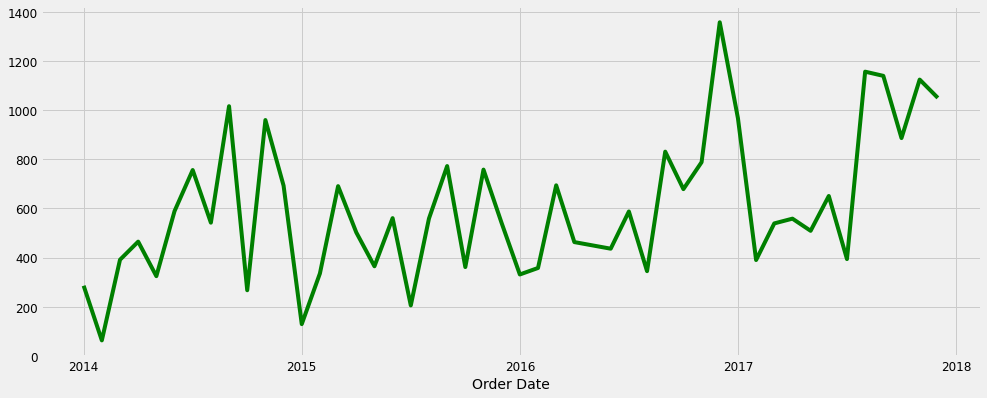

In [11]:
f.plot(figsize=(15,6), color = 'green')
plt.show()

Here, we observe the seasonality of the data. Sales is higher towards the end of the year when compared to the beginning of each year.
There is a general upward trend in sales with some dips in the middle.

## Stationarity Check

To apply time series forecasting, we must ensure that the time series is stationary.
When a time series is stationary and behaves in a certain way over a specific time period, we can then assume that it will behave in the same way at a later point in time as well.

Method 1: Rolling Statistics-
Time series is stationary if rolling mean and rolling deviation is constant with time.

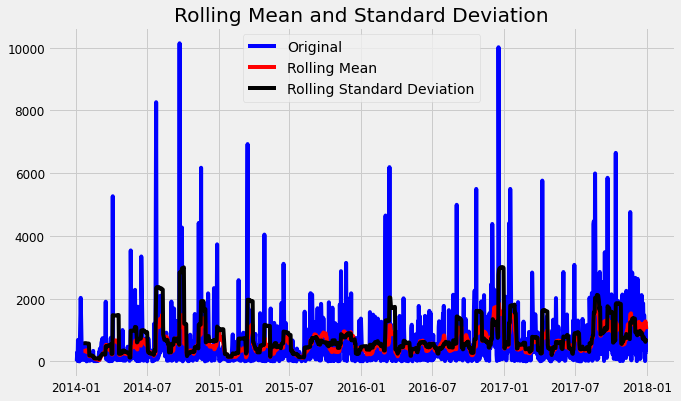

In [12]:
#Check for stationarity
#determine rolling statistics

rollmean = furniture.rolling(window=12).mean()
rollstd = furniture.rolling(window=12).std()

#Plot the rolling statistics
original = plt.plot(furniture, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Standard Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block = False)


We can see that the rolling mean and standard deviation is not constant; the time series is not stationary.
This is a visual technique


Method 2: Dickey-Fuller Test-
For stationarity, the p-value should be low and the critical values as close to the test statistic.

In [13]:
#Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey Fuller Test:")
DFTest = adfuller(furniture['Sales'], autolag = 'AIC')

DFOutput = pd.Series(DFTest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', '#Observations Used'])
for key,value in DFTest[4].items():
    DFOutput['Critical Value (%s)'%key] = value
    
print(DFOutput)


Results of Dickey Fuller Test:
Test Statistic           -30.973357
p-value                    0.000000
#Lags Used                 0.000000
#Observations Used      1147.000000
Critical Value (1%)       -3.436064
Critical Value (5%)       -2.864063
Critical Value (10%)      -2.568113
dtype: float64


P-value is greater than the threshold and the test statistic is greater than the critical values.
Thus, the time series is not stationary.

### Methods to bring about stationarity

Method 1: Subtracting rolling mean 

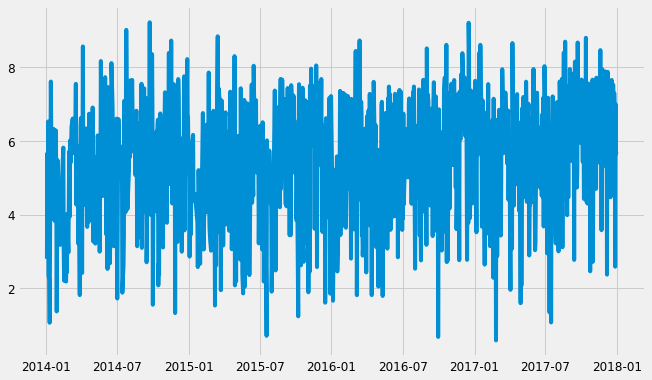

In [14]:
#Using log values to slower the rate at which rolling mean increases.
#Estimating Trend
furniture_logvalue = np.log(furniture)
plt.plot(furniture_logvalue)

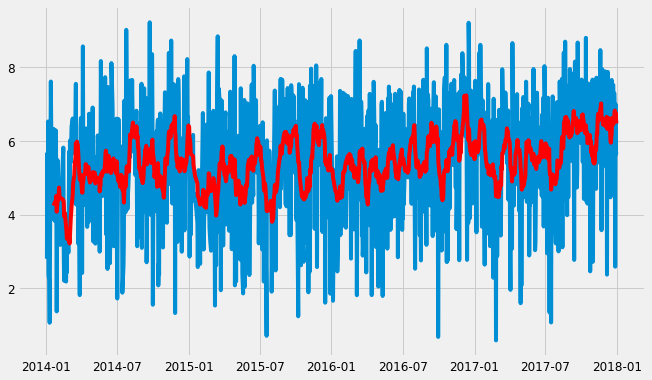

In [15]:
movingAverage = furniture_logvalue.rolling(window=12).mean()
movingSTD = furniture_logvalue.rolling(window=12).std()
plt.plot(furniture_logvalue)
plt.plot(movingAverage, color = 'red')


In [16]:
furniture_logvaluesMinusMA = furniture - movingAverage
furniture_logvaluesMinusMA.head(12)

furniture_logvaluesMinusMA.dropna(inplace = True)
furniture_logvaluesMinusMA.head(10)

,Sales
Order Date,
2014-01-20,556.189143
2014-01-23,41.693404
2014-01-26,532.341545
2014-01-27,89.160918
2014-01-28,-0.150933
2014-01-30,236.159564
2014-02-02,26.246475
2014-02-03,92.379591
2014-02-04,129.877730


In [17]:
#Creating a function to run the two tests to determine stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
     
    
    #Plot rolling statistics:
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
             
    #Perform Dickey-Fuller Test:
    print('Results of Dickey Fuller Test:')
    DFTest = adfuller(timeseries['Sales'], autolag = 'AIC')
    DFOutput = pd.Series(DFTest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', '#Observations Used'])
    for key,value in DFTest[4].items():
        DFOutput['Critical Value (%s)'%key] = value
    print(DFOutput)

    
    
    

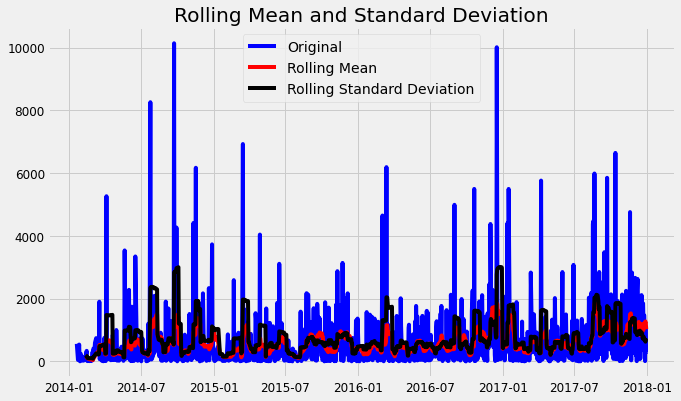

Results of Dickey Fuller Test:
Test Statistic           -30.816181
p-value                    0.000000
#Lags Used                 0.000000
#Observations Used      1136.000000
Critical Value (1%)       -3.436119
Critical Value (5%)       -2.864088
Critical Value (10%)      -2.568126
dtype: float64


In [19]:
test_stationarity(furniture_logvaluesMinusMA)

In [20]:
#P-value is less, critical value ssimilar to test statistic

Method 2: Applying exponential decay to transform time series such that it is stationary.

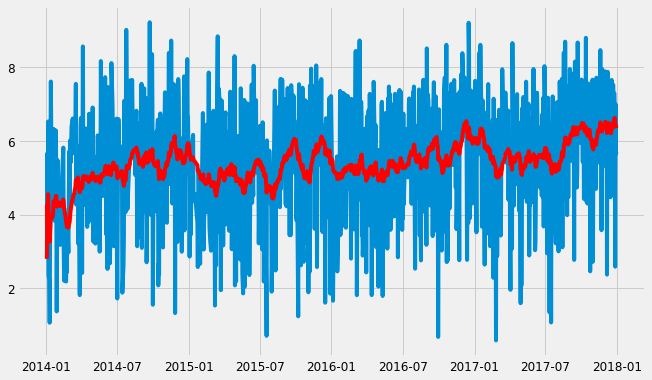

In [21]:
#Calculate weighted average of time-series to check the trend of time series
ExponentialDecayWA = furniture_logvalue.ewm(halflife =12,min_periods=0,adjust = True).mean()
plt.plot(furniture_logvalue)
plt.plot(ExponentialDecayWA,color = 'red')

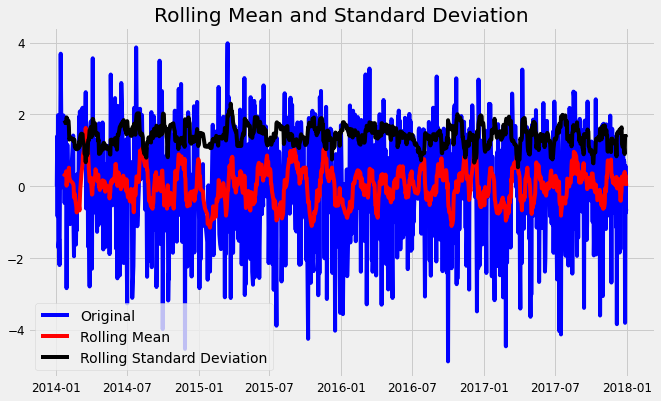

Results of Dickey Fuller Test:
Test Statistic         -1.732170e+01
p-value                 5.476547e-30
#Lags Used              3.000000e+00
#Observations Used      1.144000e+03
Critical Value (1%)    -3.436079e+00
Critical Value (5%)    -2.864070e+00
Critical Value (10%)   -2.568117e+00
dtype: float64


In [22]:
furniture_logvaluesMinusWA = furniture_logvalue - ExponentialDecayWA
test_stationarity(furniture_logvaluesMinusWA)

Method 3: Another method is to apply shifting. Subtracting every point by the one before it.

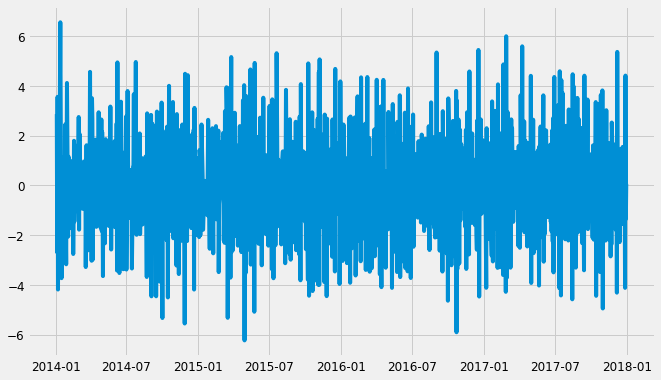

In [23]:
furniture_shift = furniture_logvalue - furniture_logvalue.shift()
plt.plot(furniture_shift)

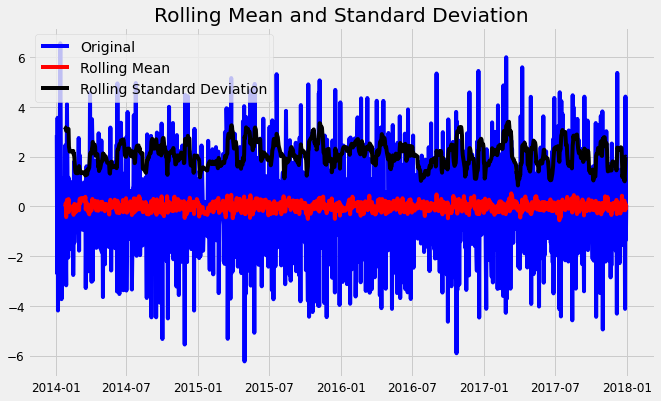

Results of Dickey Fuller Test:
Test Statistic         -1.159606e+01
p-value                 2.718832e-21
#Lags Used              2.100000e+01
#Observations Used      1.125000e+03
Critical Value (1%)    -3.436176e+00
Critical Value (5%)    -2.864113e+00
Critical Value (10%)   -2.568140e+00
dtype: float64


In [24]:
furniture_shift.dropna(inplace = True)
test_stationarity(furniture_shift)

The value of d is 1. The process of differentiation has been done once to get stationarity.


Here, we see that the rolling mean is somewhat constant(almost horizontal). Time shifting gave a stationarity to the time series which is better than the original.

## Time series decomposition to noise, trend, seasonality and using ARIMA

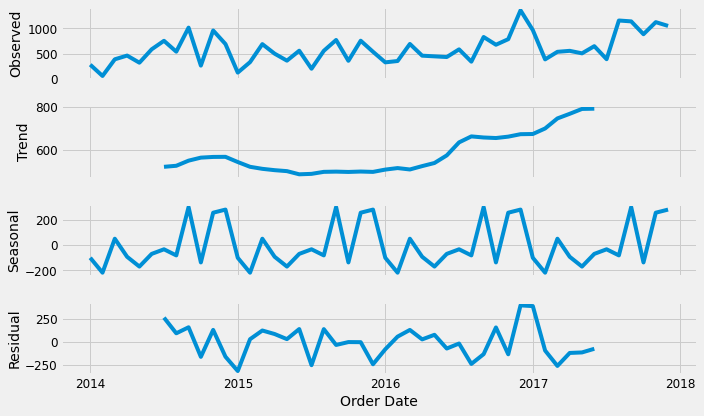

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(f, model='additive')
fig = decomposition.plot()
plt.show()

The furniture sales is unstable in nature. In the 'Seasonal' plot, we see regular repeating patterns which points at seasonal trend in furniture sales.


Now we obtain the values of parameters p and q.


p is the AR order and q is the MA order.

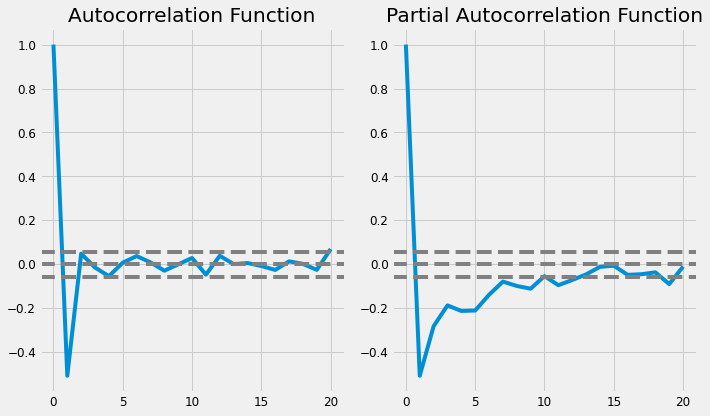

In [26]:
#ACF and PACK Plot
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(furniture_shift, nlags = 20)
lag_pacf = pacf(furniture_shift, nlags = 20, method = 'ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y = -1.96/np.sqrt(len(furniture_shift)),linestyle='--',color='gray')
plt.axhline(y = 1.96/np.sqrt(len(furniture_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')



#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y = -1.96/np.sqrt(len(furniture_shift)),linestyle='--',color='gray')
plt.axhline(y = 1.96/np.sqrt(len(furniture_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From the ACF and PACF plots, we get the value of q and p as 1 respectively. We get this value when the correlation hits the upper confidence band for the first time.

Plotting AR Model


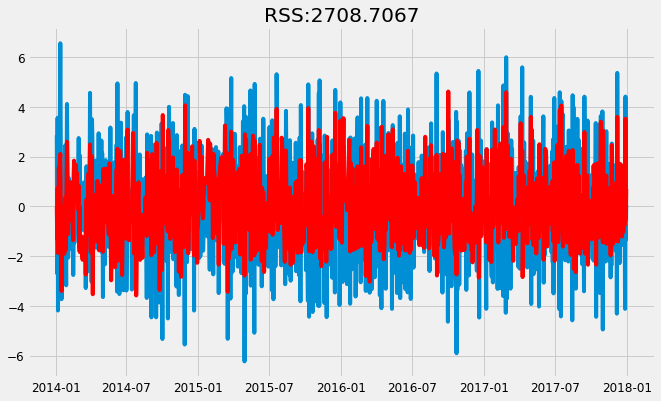

In [27]:
from statsmodels.tsa.arima_model import ARIMA

#AR model

model=ARIMA(furniture_logvalue, order = (1,1,1))
results_AR = model.fit(disp=-1)
plt.plot(furniture_shift)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues-furniture_shift['Sales'])**2))
print('Plotting AR Model')

Plotting MA Model


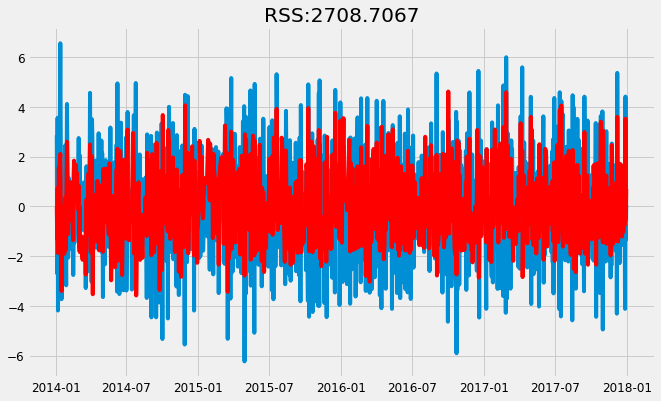

In [28]:
#MA Model potting


model=ARIMA(furniture_logvalue, order = (1,1,1))
results_MA = model.fit(disp=-1)
plt.plot(furniture_shift)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS:%.4f'%sum((results_MA.fittedvalues-furniture_shift['Sales'])**2))
print('Plotting MA Model')

We have the results of Residual Sum of Squares of AR and MA. We will see that combining both in ARIMA gives us a better result.

## Time series forecasting with ARIMA

We know the value of parameters p,d,q. Using grid search to find the set of parameter values for verification.

In [29]:
#Parameter Combination
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
#m of 12 for monthly data suggests a yearly seasonal cycle.

In [31]:
#Parameter Selection using grid search
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(f,order = param, seasonal_order = param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            
            # print(results.mle_intervals)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue
        

C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1305.415422254443
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.0876543936832


C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1498.692131146344
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.6891395292472
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3088.2447526044443
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.7601415814759
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:517.4952646586494
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:nan

C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.6922094460085
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1317.0470455568263


C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:500.0109385290892


C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1440.828400502745
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:335.7148959418817
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:637.3530008828161
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2839.6493099359077
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:473.71539674554106
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:489.94199700276977
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2591.0370458143943
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:330.7061513093236
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:680.4032716562346


C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1555.782711466129
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:501.7031226672368
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:500.21905344214457


C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1454.2896575412694
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:331.0719973254953
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:651.1768264308268
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:81552.57767185626
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:488.431419613282
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:489.25464004381257
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2639.809006878239


C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:331.71368022735686
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:658.0713305703066
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2025.8321186075195
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:494.9076797373941
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:482.80837530249556


C:\Users\Shagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1353.3803448764345
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:321.2325469884308
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:638.7962401173412
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:5107.194265998252
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:475.713885195653
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:478.69873017432724
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3727.638685991509
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:318.20664790847013


The above output suggests that ARIMA(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 318.20664790847013.
Value of p,d,q is 1,1,1.
We know fit the model.

In [32]:
#Fitting this ARIMA model
mod = sm.tsa.statespace.SARIMAX(f,
                                order=(1,1,1),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity = False,
                                enforce_invertibility=False)
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2479      0.328      0.755      0.450      -0.395       0.891
ma.L1         -0.9389      0.462     -2.030      0.042      -1.845      -0.032
ar.S.L12      -0.6135      0.348     -1.762      0.078      -1.296       0.069
sigma2      7.421e+04   2.68e+04      2.768      0.006    2.17e+04    1.27e+05


## Validating the model

To understand how accurate the model is, lt us predict the sales value of office supplies from 2017. We can compare it to the actual sales values that we have in 2017 and find the accuracy.

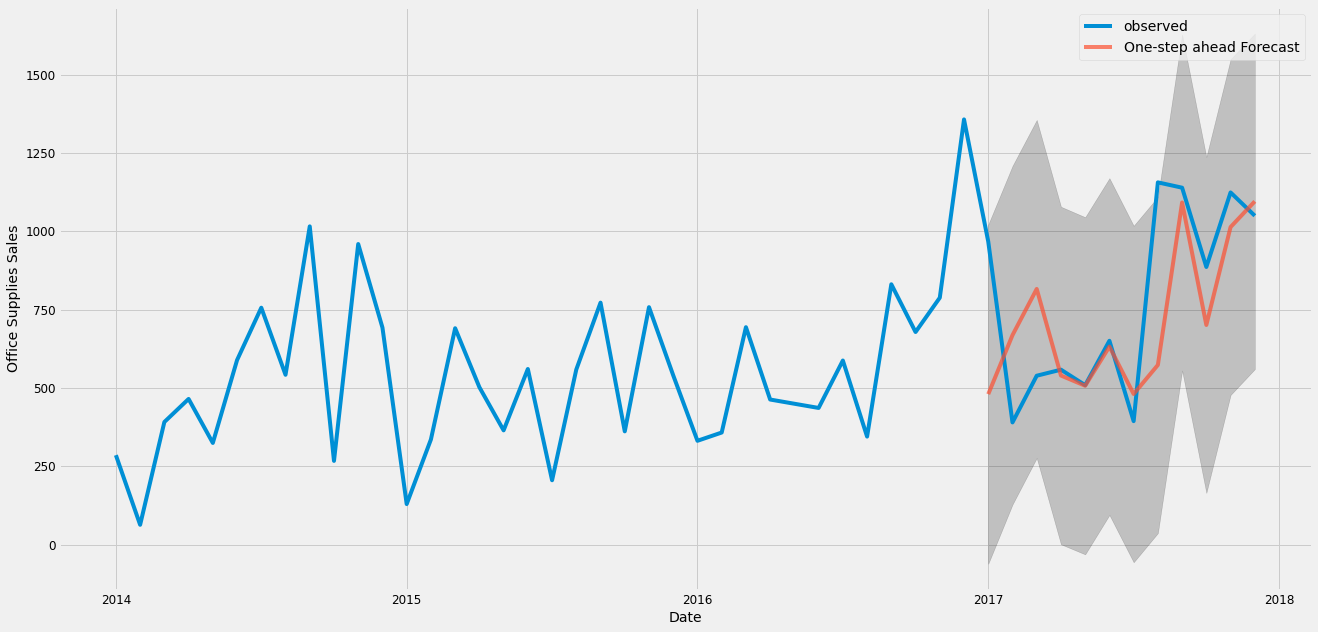

In [33]:
#Validating forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = f['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

We see that there is an upward trend in sales over 2017.

## Future Sales Forecast

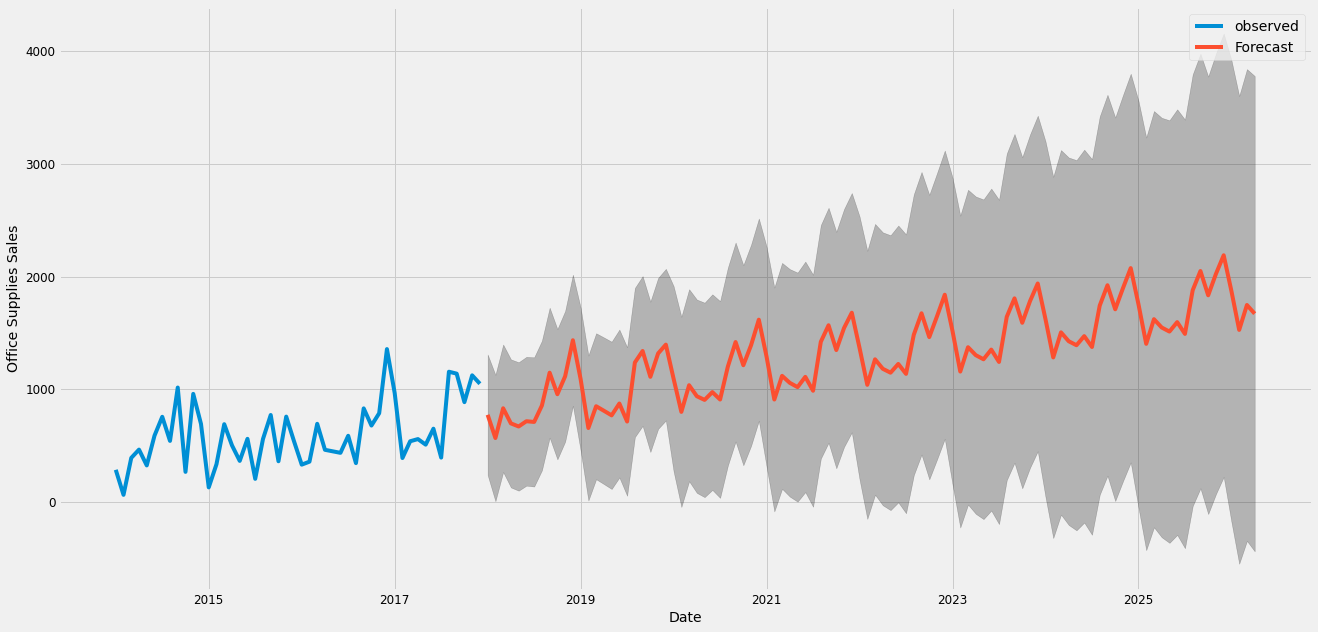

In [34]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = f.plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

The model forecasts similar seasonality in furniture sales in the future.